<a href="https://colab.research.google.com/github/dacenish/Airline-Passenger-Referral-Prediction/blob/main/Individual_Colab_Airline_Passenger_Referral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

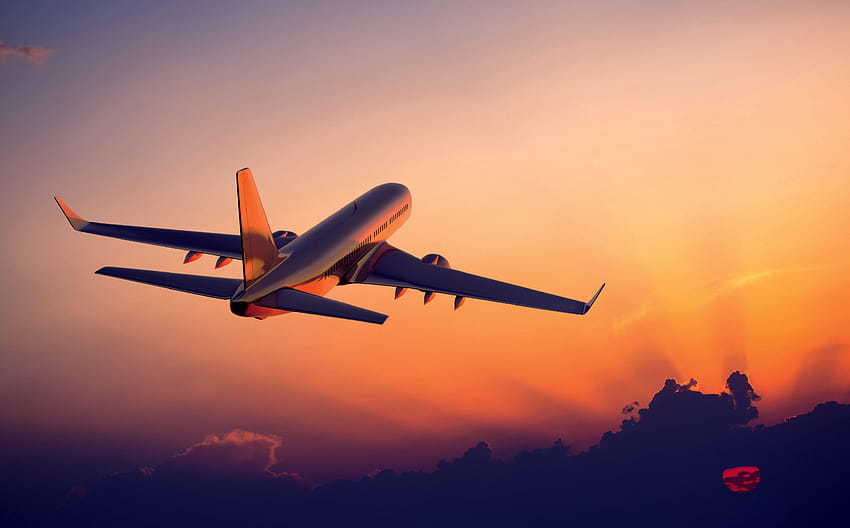

# **Project Name**    - Airline Passenger Referral Prediction



##### **Project Type**    - EDA and Machine learning classification project with supervised models and Artificial Neural Network model.
##### **Contribution**    - Team
##### **Team Member 1 -** Abhijeeth V S
##### **Team Member 2 -** Danish Zia


# **Project Summary -**

##### **Introduction**  
The airline industry plays a crucial role in modern transportation, with numerous airlines serving various routes worldwide. To make informed decisions in this highly competitive industry, airlines and stakeholders rely on data-driven insights. Machine learning models are indispensable tools in this regard, allowing for the classification of airlines based on different criteria. This document outlines the development and implementation of an airline classification machine learning model.

A diverse dataset of airline information is essential for training a classification model. This dataset includes relevant features, such as:

1. **airline** - Airline name
2. **overall** - Overall score
3. **Author** - Author information
4. **review_date** - Customer Review posted date
5. **Customer_review** - Actual customer review(Textual)
6. **aircraft** - Type of aircraft
7. **traveller_type** - Type of traveller
8. **cabin**- Cabin type chosen by traveller (Economy, Business,Premium economy,First class)
9. **route** - Route flown by flyer
10. **date_flown** - Date of travel
11. **seat_comfort** - Rating provided towards seat comfort
12. **cabin_service** - Rating provided towards cabin service.
13. **food_bev** - Rating provided towards food and beverages supplied during travel.
14. **entertainment** - Rating provided towards on board flight entertainment
15. **ground_service** - Rating provided towards ground service staff.
16. **value_for_money** - Rating provided towards value for money.
17. **recommended** - Airline service Recommended by flyer (Yes/No)

Data preprocessing is crucial to ensure data quality and consistency. Steps may include handling missing values, encoding categorical variables, and normalizing numerical features.

In [1]:
# Import the 'drive' module from the 'google.colab' library
from google.colab import drive

# Mount Google Drive to access files and directories
# '/content/drive' is the default path where Google Drive will be mounted
drive.mount('/content/drive')


Mounted at /content/drive


# **GitHub Link -**

1. Danish Zia - https://github.com/dacenish

# **Problem Statement**


The goal of this machine learning project is to classify airlines into categories based on certain features or attributes. Classification can serve multiple purposes, such as identifying potential partners for codeshare agreements, assisting in pricing strategies, or aiding in market analysis. In this project, We will be exploring if flyers would recommend the airline to their friends and families, based on their travel experience,reviews and ratings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Importing Project dependencies -

In [2]:
# Import necessary libraries
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For creating plots and visualizations
import seaborn as sns             # For advanced data visualization
import missingno as msno          # For visualizing missing data patterns
from google.colab import drive    # For mounting Google Drive
from sklearn.preprocessing import LabelEncoder  # For label encoding categorical variables
from sklearn.impute import KNNImputer           # For imputing missing values using KNN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.neighbors import KNeighborsClassifier    # For K-Nearest Neighbors classification
from sklearn.ensemble import RandomForestClassifier   # For Random Forest classification
from sklearn.linear_model import LogisticRegression   # For Logistic Regression classification
from sklearn.metrics import confusion_matrix, classification_report  # For evaluating classification models

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Display plots inline in the Jupyter Notebook or Colab environment
%matplotlib inline


### Dataset Loading

In [3]:
# Define the file path to the CSV data file on Google Drive
filepath = '/content/drive/MyDrive/data_airline_reviews.csv'

# Read the CSV data into a Pandas DataFrame
df = pd.DataFrame(pd.read_csv(filepath))

# Make a copy of the DataFrame for review(text) analysis
df1 = df.copy()  # Creating a copy of the original DataFrame for analysis of the 'review' text column


### Dataset First View

In [4]:
# Display the first 3 rows of the DataFrame to get an initial look at the dataset
df.head(3)


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display the last 3 rows of the DataFrame to inspect the end of the dataset
df.tail(3)


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [6]:
# Get the number of rows and columns in the dataset
df.shape


(131895, 17)

### Dataset Information

In [7]:
# Display information about the dataset, including data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [8]:
# Count the number of duplicate rows in the dataset
print('Duplicate Value Counts: ', df.duplicated().sum())


Duplicate Value Counts:  70711


In [9]:
# Remove duplicate rows from the dataset in-place
df.drop_duplicates(inplace=True)

# Display the new shape of the DataFrame after dropping duplicates
print('Shape of Dataframe after dropping duplicates:', df.shape)


Shape of Dataframe after dropping duplicates: (61184, 17)


#### Missing Values/Null Values

In [10]:
# Calculate the percentage of missing values for each column in the DataFrame
df_null = df.isnull().sum() / len(df) * 100

# Create a DataFrame to display the null value percentages
pd.DataFrame(df_null, columns=['Null Value Percentage'])


,Null Value Percentage
airline,0.001634
overall,2.914161
author,0.001634
review_date,0.001634
customer_review,0.001634
aircraft,69.782950
traveller_type,38.644090
cabin,4.051713
route,38.688219
date_flown,38.817338


<Axes: >

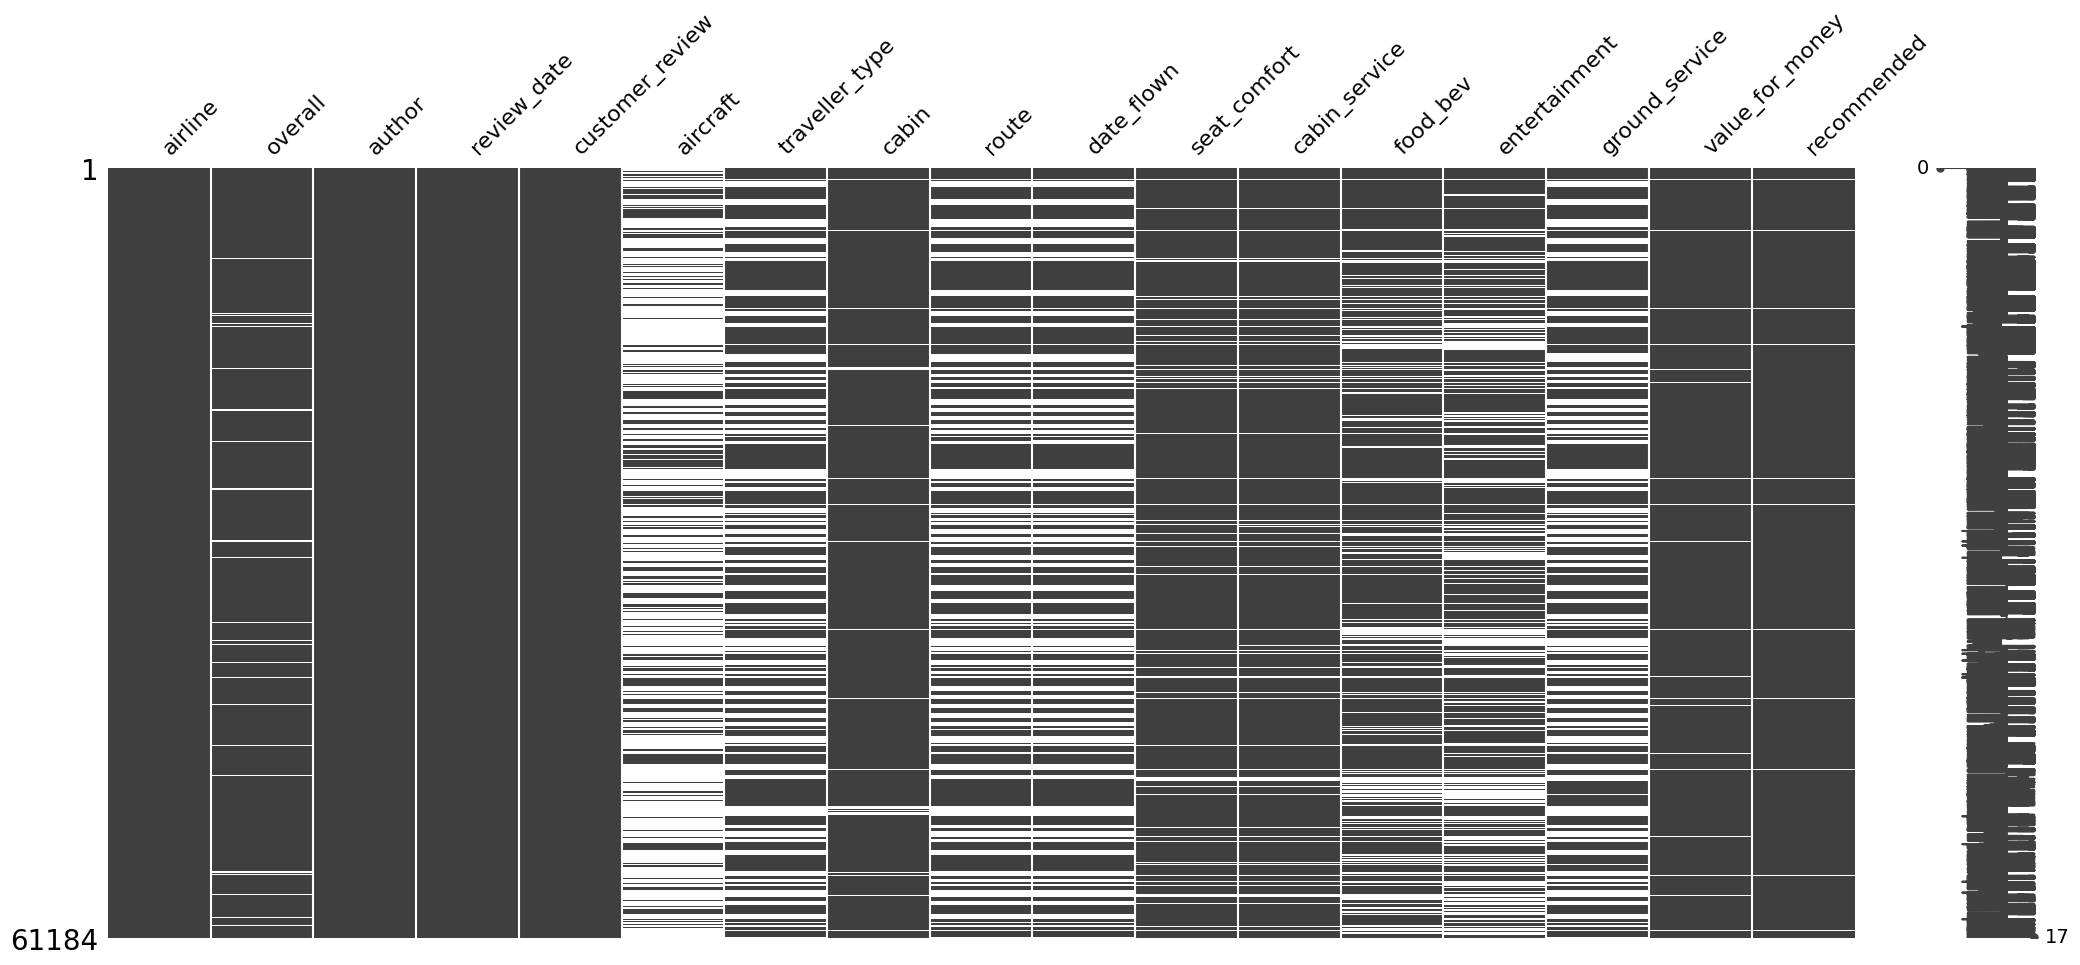

In [11]:
# Visualize missing values using a matrix plot
msno.matrix(df)


### What did you know about your dataset?

**Data includes airline reviews from 2006 to 2019 for popular airlines around the world with user feedback ratings and reviews based on their travel experience. Data is scraped in Spring 2019. Feature descriptions briefly as follows:**

## ***2. Understanding Your Variables***

In [12]:
# Get a list of column names in the DataFrame
columns_list = df.columns

# Create a DataFrame to display the column names with index numbers
pd.DataFrame(columns_list, columns=['Columns'], index=range(1, len(columns_list) + 1))


,Columns
1,airline
2,overall
3,author
4,review_date
5,customer_review
6,aircraft
7,traveller_type
8,cabin
9,route
10,date_flown


In [13]:
# Generate summary statistics for the numerical columns in the DataFrame and transpose the result
df.describe().T


,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


### Features Description

1. **airline** - Airline name
2. **overall** - Overall score
3. **Author** - Author information
4. **review_date** - Customer Review posted date
5. **Customer_review** - Actual customer review(Textual)
6. **aircraft** - Type of aircraft
7. **traveller_type** - Type of traveller
8. **cabin**- Cabin type chosen by traveller (Economy, Business,Premium economy,First class)
9. **route** - Route flown by flyer
10. **date_flown** - Date of travel
11. **seat_comfort** - Rating provided towards seat comfort
12. **cabin_service** - Rating provided towards cabin service.
13. **food_bev** - Rating provided towards food and beverages supplied during travel.
14. **entertainment** - Rating provided towards on board flight entertainment
15. **ground_service** - Rating provided towards ground service staff.
16. **value_for_money** - Rating provided towards value for money.
17. **recommended** - Airline service Recommended by flyer (Yes/No)

### Check Unique Values for each variable.

In [14]:
# Initialize a dictionary to store unique value counts for each variable
unique_count_dict = {}

# Iterate through the columns and count the unique values for each
for col in columns_list:
    unique_count = df[col].nunique()
    unique_count_dict[col] = unique_count

# Create a DataFrame from the unique_count_dict
unique_counts_df = pd.DataFrame(
    list(unique_count_dict.items()),
    columns=['Column', 'Unique Values'],
    index=range(1, len(unique_count_dict) + 1))

# Print or display the DataFrame showing unique value counts for each variable
unique_counts_df


,Column,Unique Values
1,airline,81
2,overall,10
3,author,44069
4,review_date,3015
5,customer_review,61172
6,aircraft,2088
7,traveller_type,4
8,cabin,4
9,route,24549
10,date_flown,63


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Define the columns with numerical missing values to be imputed
columns_to_impute = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Extract the relevant numerical columns for imputation
num_impute_data = df[columns_to_impute]

# Create a KNNImputer with a specified number of neighbors (2 in this case)
knn_imputer = KNNImputer(n_neighbors=2)

# Perform KNN imputation on the selected numerical columns
knn_imputed_data = knn_imputer.fit_transform(num_impute_data)

# Update the original DataFrame with the imputed values (convert to integers)
df[columns_to_impute] = knn_imputed_data.astype(int)


In [16]:
# Define the categorical columns to be encoded
cat_columns_to_impute = ['traveller_type', 'cabin']  # 'airline' is removed from the list

# Create a copy of the DataFrame for encoding
imputed_data = df.copy()

# Initialize a dictionary to store label encoders for each categorical column
label_encoders = {}

# Iterate through the categorical columns for encoding
for col in cat_columns_to_impute:
    # Create a LabelEncoder for the current column
    le = LabelEncoder()

    # Encode the values in the column and replace them in the DataFrame
    imputed_data[col] = le.fit_transform(imputed_data[col].astype(str))

    # Store the label encoder for potential inverse transformations
    label_encoders[col] = le


In [17]:
# Define a custom function to encode the 'recommended' column into numerical values
def rec_cat_to_no(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return value

# Apply the custom function to the 'recommended' column in the DataFrame
df['recommended'] = df['recommended'].apply(lambda x: rec_cat_to_no(x))

### Using Logistic Regression model to impute Null values for Target feature column -

In [18]:
# Assigning X and y variables -
X = df[['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']]
y = df['recommended']

# Split the data into training and testing sets
X_train = X[~y.isnull()]
y_train = y[~y.isnull()]
X_test = X[y.isnull()]  # Rows with missing 'recommended' values

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create and fit a linear regression model
imputer_model = LinearRegression()
imputer_model.fit(X_train, y_train)

# Predict missing 'recommended' values on the test set
recommended_pred = imputer_model.predict(X_test)

# Update the DataFrame with imputed values
df.loc[df['recommended'].isnull(), 'recommended'] = recommended_pred

# Optionally, convert the 'recommended' column to integer data type if needed
df['recommended'] = df['recommended'].astype(int)


### What all manipulations have you done and insights you found?

Based on the Intial Data dive, multiple null values were found across all categories, as mentioned a few steps above. The following data wrangling processes were cacrried out :

1. Duplicate Values were dropped from the Dataframe.
2. KNN imputer was utilised in order to impute numerical values based on nearest 2 neighbor values for the columns containing the rating parameters. Namely, **['overall', 'seat_comfort', 'cabin_service', 'food_bev','entertainment', 'ground_service', 'value_for_money']**
3. Label encoder from scikit learn's preprocessing library was utilised to encode categorical data for columns **[ 'traveller_type', 'cabin']**
4. A custom function was defined to carry out One hot encoding for the target feature **['recommended']**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Frequecy Distribution of Evaluation Critera - *Histosgram*

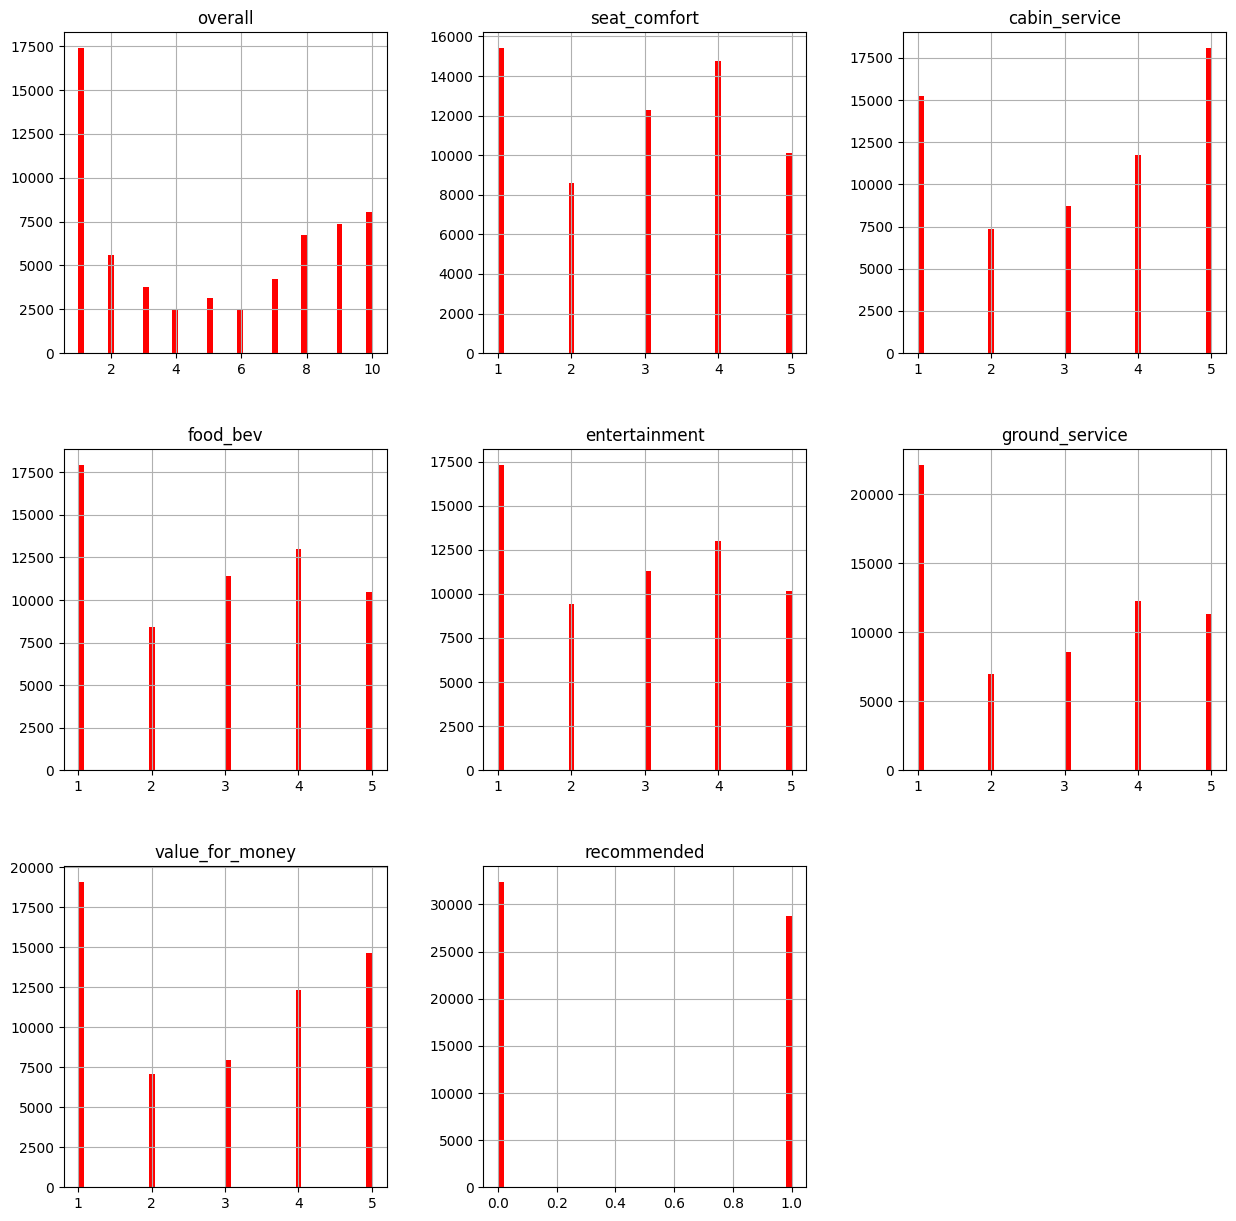

In [19]:
# Chart -  1 visualization code

#frequency distribution using histgram
df.hist(bins=50, figsize=(15,15),color = 'red')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Visually representing the distrubution of rating for different metrics such as **overall**, **seat_comfrt**,**cabin_services**, **food_bev**, **entertainment**, **ground-services**, **value_for_money**.

##### 2. What is/are the insight(s) found from the chart?

cabin_service:

- **1 Star**: Exceptionally high preference.
- **4 Star** and **6 Star**: Least preferred.

seat_comfort:

- Most preferred rating.
- **2 Star**: Least preferred.

food_bev:

- **1 Star**: Most preferred rating.
- **2 Star**: Least preferred.

entertainment:

- **1 Star**: Most preferred rating.
- **2 Star**: Least preferred.

ground_service:

- **1 Star**: Most preferred rating.
- **2 Star**: Least preferred.

value_for_money:

- **1 Star**: Most preferred rating.
- **2 Star**: Least preferred.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Top 5 Flown Route - Horizontal Bar Graph.

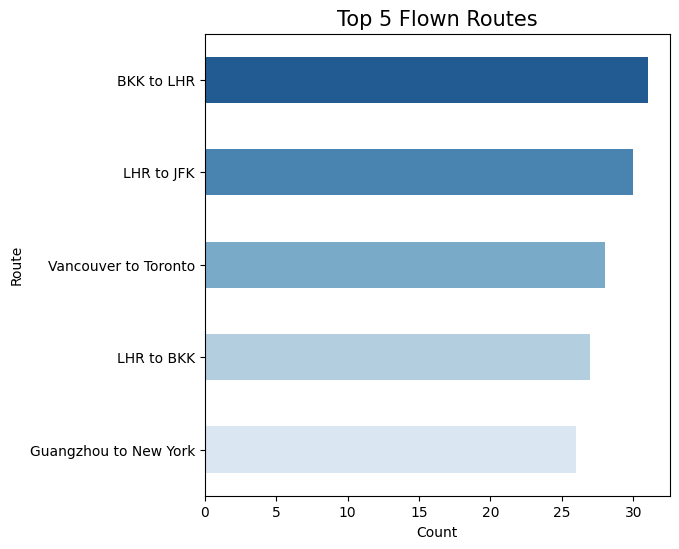

In [20]:
# Chart - 2 visualization code

# Get the top 5 most flown route through visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 5 most flown routes and their counts
top_routes = df['route'].value_counts().sort_values(ascending=False)[:5]

# Create a bar plot to visualize the top 5 flown routes
plt.figure(figsize=(6, 6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette='Blues_r', orient="h", width=0.5)

plt.xlabel('Count')
plt.ylabel('Route')
plt.title('Top 5 Flown Routes', fontsize=15)
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.show()



1. Why did you pick the specific chart?

To represent **categorical** value with respect to the **numerical** value bar plot is a suitable choice.

##### 2. What is/are the insight(s) found from the chart?


1.BKK to LHR

2.LHR to JKF

3.Vancover to Toronto

4.LHR to BKK

5.Guangzhou to New York


From the above represent we can infer that **BKK - LHR(Bangkok to London)** is the most flown route follwed by **LHR - JKF(London - New York)** and **Guangzhou to New York** is the least flown rount

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The airline should primarily focuses on the most frequently traveled routes as
they generate a significant portion of the airline's revenue.

#### Variation of Recommendion Over Different Evalaution Criteria - Vertical Bar Graph

In [21]:
# Chart - 3 visualization code
features= df.columns
features

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

overall


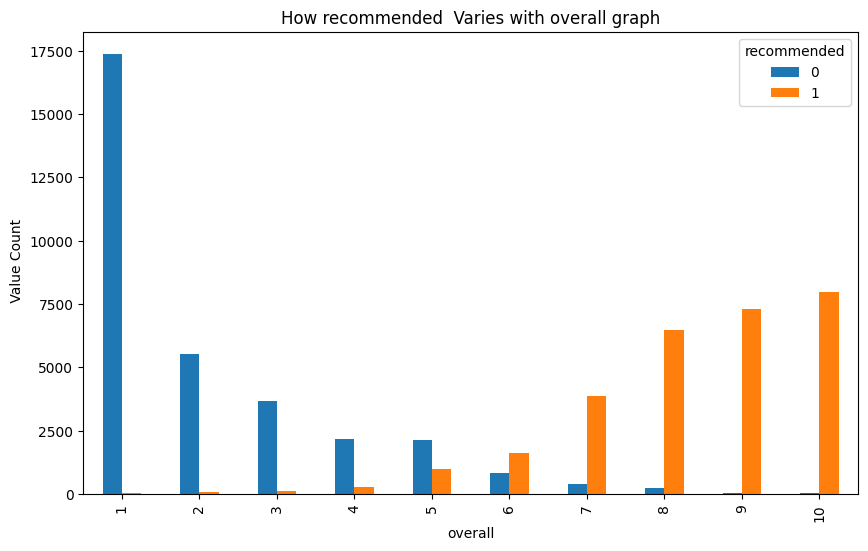

seat_comfort


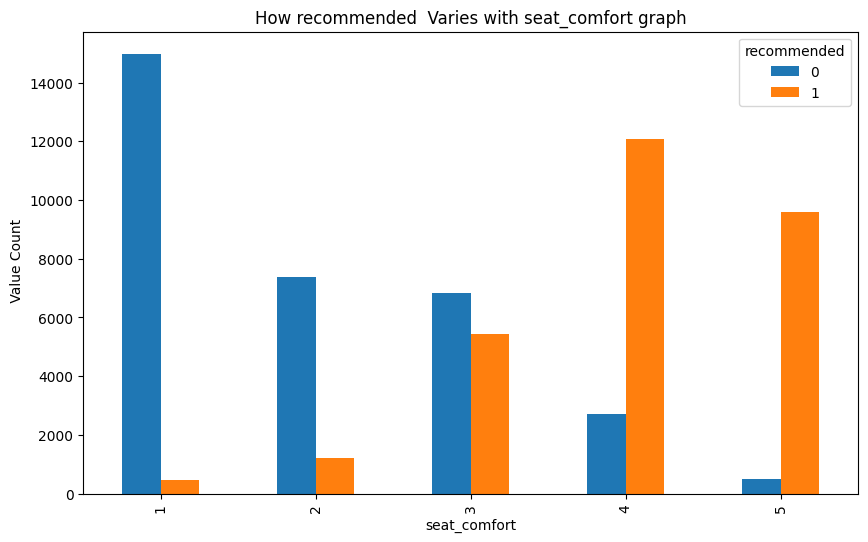

cabin_service


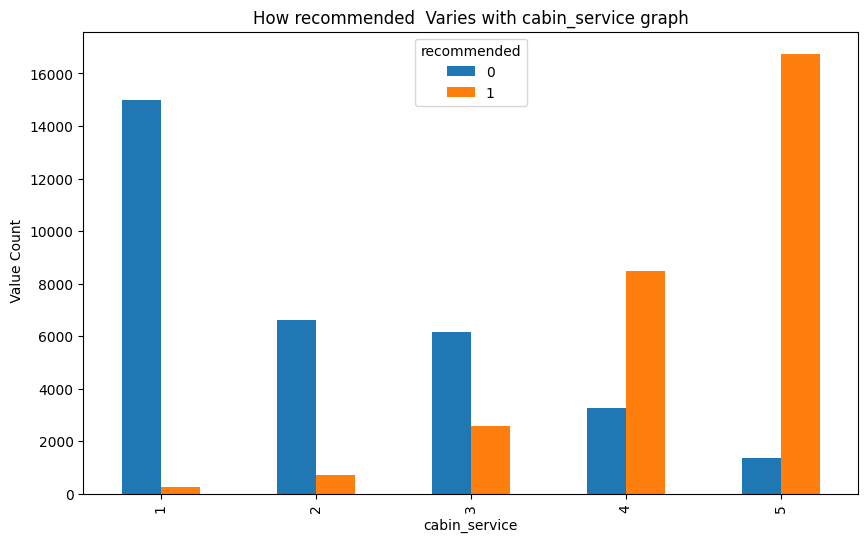

food_bev


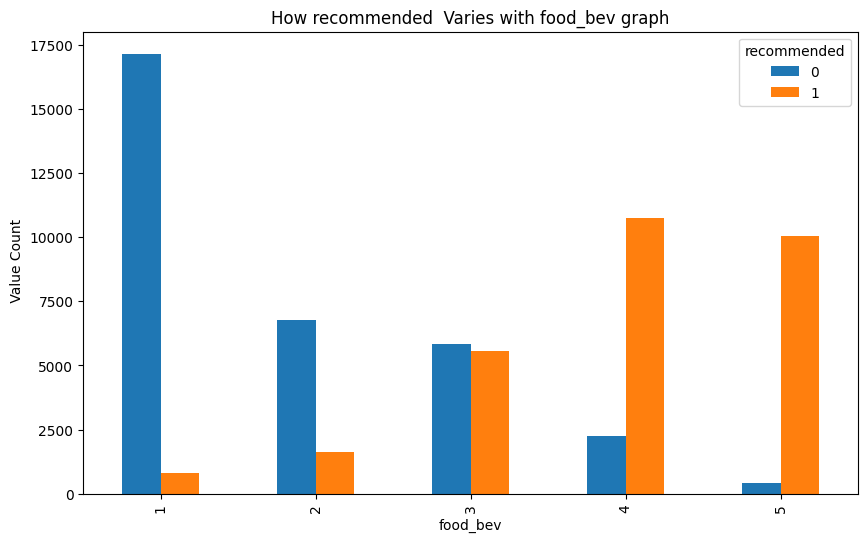

entertainment


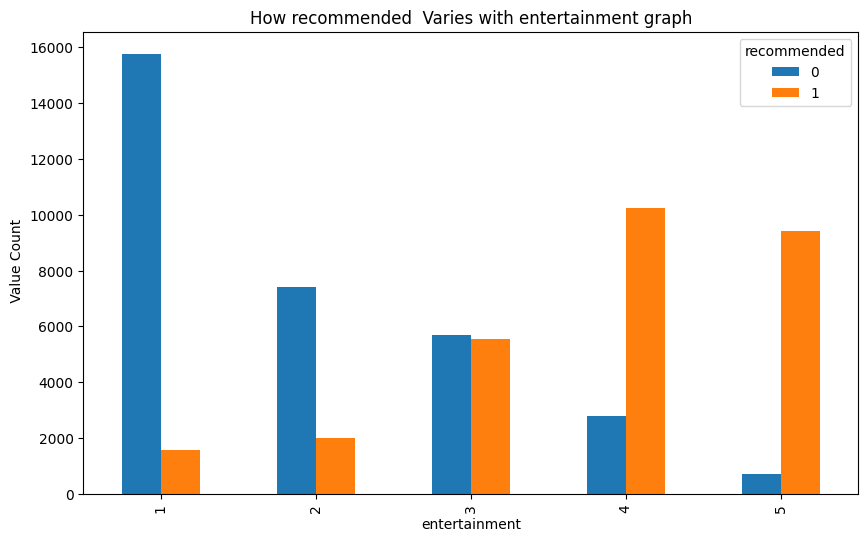

ground_service


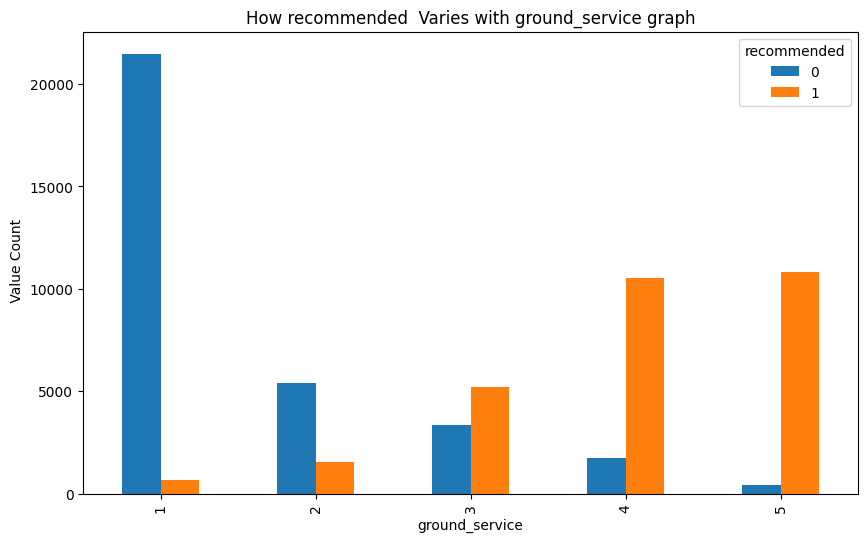

value_for_money


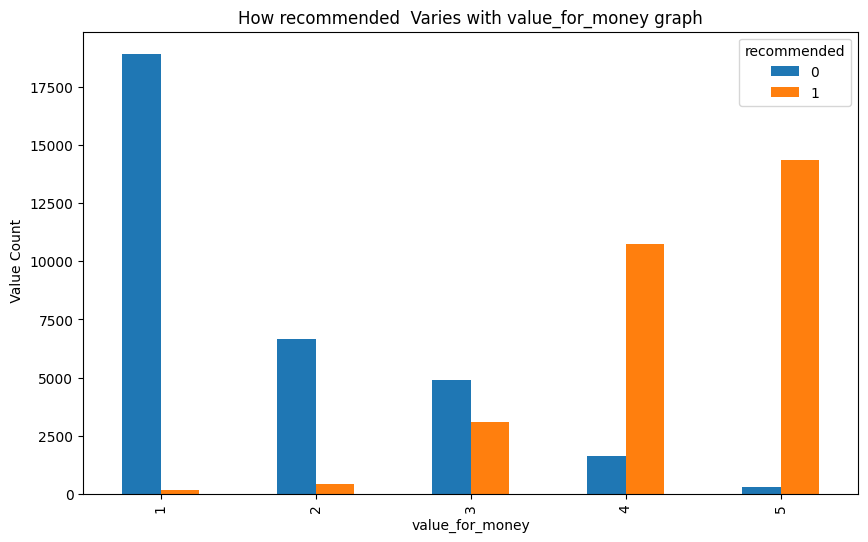

In [22]:
features_1= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended', 'date_flown','traveller_type','cabin'])

for feature in features_1:
  print(feature)
  df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(10,6),)
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

##### 1. Why did you pick the specific chart?

A **double bar graph** can be a highly effective chart for visualizing and gaining insights by comparing **recommendations** and **non-recommendations** for various evaluation criteria.

##### 2. What is/are the insight(s) found from the chart?


From all above graphs we can see that when a person have given **higher rating** then we have also **recommended** to the friend.
We can also see some **anomilities** where a person have given very **low rating** and **still recommended** and visa versa.

So one thing we can be sure of that if a person have given an **overall rating** of **less than 2** we wont be **recommended**.
Whereas a person who have given a **rating greater than 8** there are **high chances** that he will **recommend**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Evaluations across various criteria hold great significance in the airline industry as they provide valuable insights into passengers' experiences and help identify areas that require improvement.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [23]:
# Handling Missing Values & Missing Value Imputation

# Drop specific columns from the DataFrame
columns_to_drop = ['aircraft', 'route', 'date_flown', 'author', 'review_date', 'customer_review']
df.drop(columns=columns_to_drop, inplace=True)

In [24]:
df.dropna(how = 'any', inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

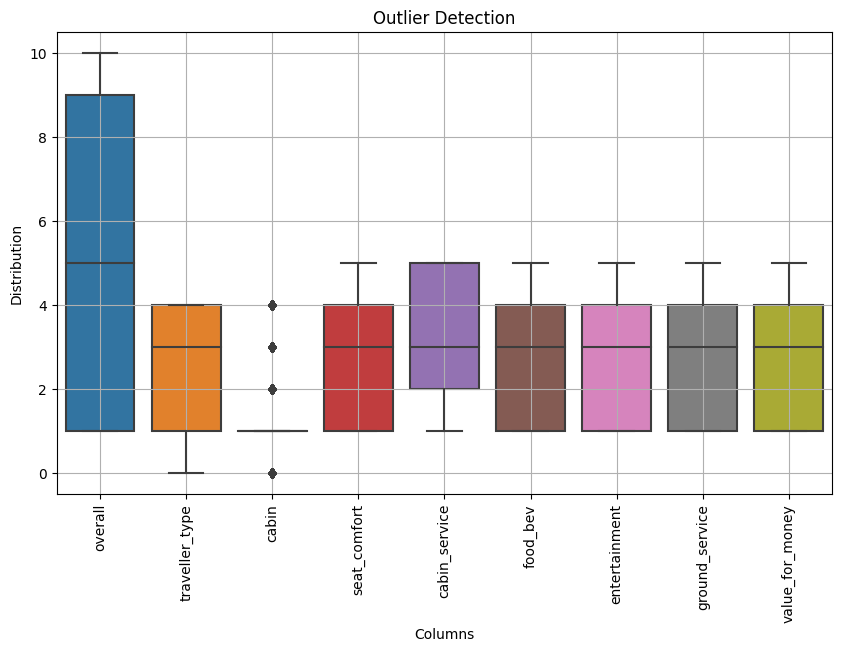

In [25]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(10,6))
sns.boxplot(imputed_data)
plt.xlabel('Columns')
plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.grid()
plt.title('Outlier Detection')
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [26]:
df1.dropna(how='any',inplace=True)
df1.drop_duplicates(inplace=True)

In [27]:
review_df = df1[['customer_review', 'recommended']]
review_df['review_lenght'] = review_df['customer_review'].str.len()
review_df.head(5)

,customer_review,recommended,review_lenght
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955
15,âœ… Trip Verified | Basel to Cape Town via Ist...,no,316
17,Not Verified | Abu Dhabi to Luxembourg via Ist...,yes,549
19,âœ… Trip Verified | The experience with Turkis...,no,1117
29,âœ… Trip Verified | Houston to Kiev via Istanb...,no,936


In [28]:
review_df.isnull().sum()

customer_review    0
recommended        0
review_lenght      0
dtype: int64

In [29]:
review_df.shape

(13189, 3)

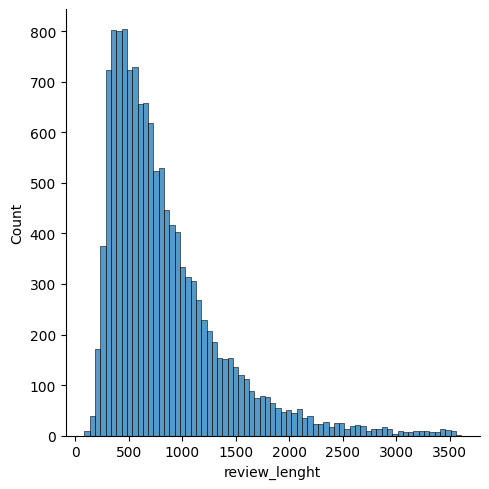

In [30]:
import seaborn as sns
sns.displot(review_df['review_lenght'])

no


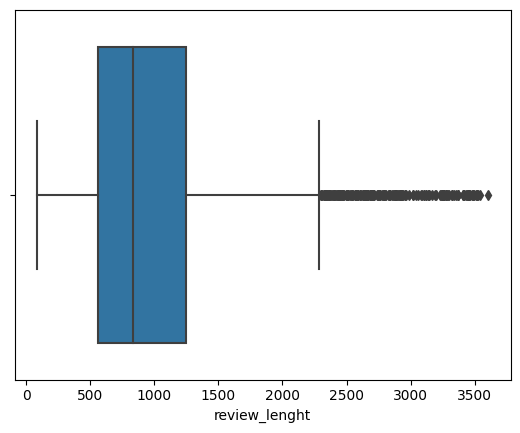

yes


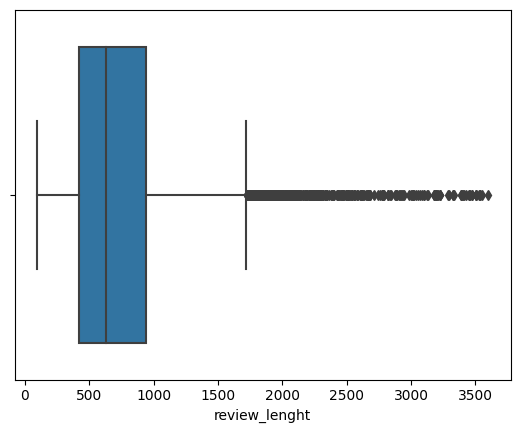

In [31]:
import matplotlib.pyplot as plt

GN= review_df.groupby('recommended')

for name , name_df in GN:
  print(name)
  sns.boxplot(x='review_lenght',data= name_df)
  plt.show()


In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
# downloading all stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [34]:
def preprocess_text(text):

  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  tokens = word_tokenize(text)

  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]

  lemmatizer = WordNetLemmatizer()
  lemitizer_token = [lemmatizer.lemmatize(token) for token in tokens]

  prepocessed_text = ' '.join(lemitizer_token)

  return prepocessed_text

In [35]:
review_df['preprocessed_review'] = review_df['customer_review'].apply(preprocess_text)
review_df.head(5)

,customer_review,recommended,review_lenght,preprocessed_review
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955,trip verified flew turkish airline iadistkhi r...
15,âœ… Trip Verified | Basel to Cape Town via Ist...,no,316,trip verified basel cape town via istanbul arr...
17,Not Verified | Abu Dhabi to Luxembourg via Ist...,yes,549,verified abu dhabi luxembourg via istanbul auh...
19,âœ… Trip Verified | The experience with Turkis...,no,1117,trip verified experience turkish airline devas...
29,âœ… Trip Verified | Houston to Kiev via Istanb...,no,936,trip verified houston kiev via istanbul fare s...


In [36]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(review_df['preprocessed_review'])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, review_df['recommended'], test_size=0.2, random_state=42)

classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)


In [38]:
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8817285822592873
              precision    recall  f1-score   support

          no       0.85      0.78      0.81       876
         yes       0.90      0.93      0.91      1762

    accuracy                           0.88      2638
   macro avg       0.87      0.86      0.86      2638
weighted avg       0.88      0.88      0.88      2638

[[ 685  191]
 [ 121 1641]]


In [39]:
# Initializing NaiveBayes-BernoulliNB Classifier
BNB = BernoulliNB(fit_prior=False, alpha=0.2)

BNB.fit(X_train, y_train)
y_pred = BNB.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8442001516300227
              precision    recall  f1-score   support

          no       0.79      0.73      0.76       876
         yes       0.87      0.90      0.89      1762

    accuracy                           0.84      2638
   macro avg       0.83      0.82      0.82      2638
weighted avg       0.84      0.84      0.84      2638

[[ 640  236]
 [ 175 1587]]


#### 2. Feature Selection

In [40]:
# Select your features wisely to avoid overfitting

X = df.drop(['recommended', 'airline','traveller_type','cabin'],axis = 1) #dropping airline col
y = df['recommended']

##### What all feature selection methods have you used  and why?

I have been using all the Evaluation Criteria such as **['overall', 'seat_comfort', 'cabin_service', 'food_bev','entertainment', 'ground_service', 'value_for_money']** because these are the criteria on the passengers have given the ratings for **overall** on **1-10 stars** and rest were evaluated in on **1-5 stars**.

##### Which all features you found important and why?

All the features which contained ratings I find it important.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [41]:
# Transform Your data

### 6. Data Scaling

In [42]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [43]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [44]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)


(30016, 7)
(7505, 7)


##### What data splitting ratio have you used and why?

 I used 80:20 Ratio as it is most preferable ratio in the industry.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [45]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 10. Predefined functions.

In [46]:
from sklearn import metrics

def get_confusion_matrix(y_test,y_pred,title):
  cf_matrix = metrics.confusion_matrix(y_test,y_pred)
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.title(title+' Confusion Matrix')
  return sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu',cbar=False)


def get_classification_report(y_test, y_pred,title):

    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    #df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    plt.title(title+' Classification Report')
    return sns.heatmap(df_classification_report,annot=True,cmap='Blues',cbar = False)



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


def perform_cross_validation(model, X=X, y=y, param_grid={}, num_folds=5, scoring='accuracy'):
    cross_val_scores = cross_val_score(model, X, y, cv=num_folds, scoring=scoring)


    grid_search = GridSearchCV(model, param_grid, cv=num_folds, scoring=scoring)
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    cross_val_scores = cross_val_score(best_model, X, y, cv=num_folds, scoring=scoring)

    # Print the cross-validation scores for each fold
    for fold, score in enumerate(cross_val_scores, 1):
        print(f'Fold {fold}: {scoring} = {score}')

    # Calculate and return the mean accuracy across all folds
    mean_accuracy = cross_val_scores.mean()

    return best_params, best_model, mean_accuracy


## ***7. ML Model Implementation***

### **1. K-Nearest Neighbors (KNN) Model:**

In [47]:
# ML Model - 3 Implementation

k_neighbor = KNeighborsClassifier(n_neighbors=3)

# Fit the Algorithm
k_neighbor.fit(X_train, y_train)

# Predict on the model
y_pred = k_neighbor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

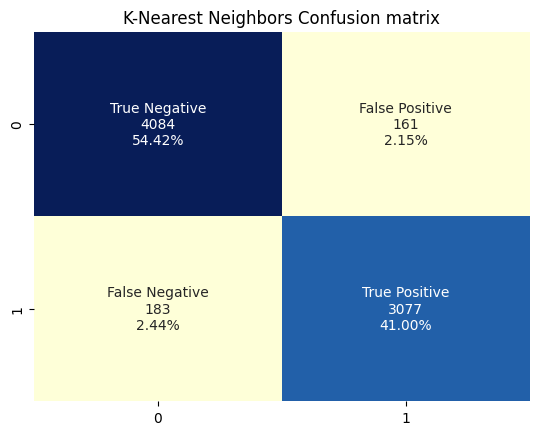

In [48]:
# Visualizing evaluation Metric Score chart
cf_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ann_confusion_matrix = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu',cbar=False)
ann_confusion_matrix
plt.title('K-Nearest Neighbors Confusion matrix')
plt.show()

In [49]:
report = classification_report(y_test, predictions, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
knn_classification_report = sns.heatmap(df_classification_report,annot = True,cmap = 'Blues',cbar = False)
knn_classification_report
plt.title('K Nearest Neighbors Classification report')
plt.show()

NameError: ignored

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
perform_cross_validation(k_neighbor)

##### Which hyperparameter optimization technique have you used and why?

**Grid Search CV** is used

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Cross Validation recorded accuracy was **0.96** and after 5 Fold accuracy decreased and recored accuracy is **0.95**.



### **2. Support Vector Machine (SVM) Model**

In [ ]:
# ML Model - 3 Implementation
from sklearn.svm import SVC

support_vector = SVC(kernel = 'linear')
# Fit the Algorithm
support_vector.fit(X_train, y_train)
# Predict on the model
y_pred = support_vector.predict(X_test)

support_vector.score(X_test, y_test)

In [ ]:
# Visualizing evaluation Metric Score chart
cf_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
svm_confusion_matrix = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu',cbar=False)
svm_confusion_matrix
plt.title('Support Vector Machines Confusion matrix')
plt.show()

In [ ]:
report = classification_report(y_test, predictions, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
svm_classification_report = sns.heatmap(df_classification_report,annot = True,cmap = 'Blues',cbar = False)
svm_classification_report
plt.title('Support Vector Machines Classification report')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
perform_cross_validation(support_vector)

##### Which hyperparameter optimization technique have you used and why?

**Grid Search CV** is used

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Cross Validation recorded accuracy was **0.96** and after 5 Fold recored accuracy **0.97**.

## **8.Future Work (Optional)**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***